In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Assuming you already loaded it before, otherwise:
data = pd.read_csv('/Users/avinashtelagamsetti/Desktop/Classwork 03102025/student_data.csv')

# Features and target
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

Linear Kernel SVM Accuracy: 0.9200
Linear Kernel SVM AUC: 0.9821


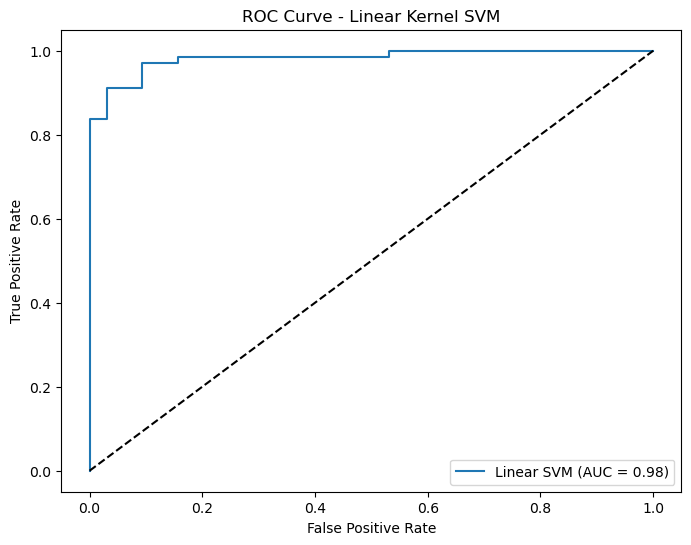

In [6]:
# Create linear kernel SVM model
svm_linear = SVC(kernel='linear', probability=True)

# Fit the model
svm_linear.fit(X, y)

# Predictions
y_pred_linear = svm_linear.predict(X)
y_prob_linear = svm_linear.predict_proba(X)[:, 1]

# Evaluate
accuracy_linear = accuracy_score(y, y_pred_linear)
auc_linear = roc_auc_score(y, y_prob_linear)

print(f"Linear Kernel SVM Accuracy: {accuracy_linear:.4f}")
print(f"Linear Kernel SVM AUC: {auc_linear:.4f}")

# ROC Curve for Linear Kernel
fpr_linear, tpr_linear, _ = roc_curve(y, y_prob_linear)

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, label=f'Linear SVM (AUC = {auc_linear:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear Kernel SVM')
plt.legend(loc='lower right')
plt.show()


In [8]:
# Create RBF kernel SVM model
svm_rbf = SVC(kernel='rbf', probability=True)

# Parameter grid for gamma
param_grid = {'gamma': [0.01, 0.1, 1, 10, 100]}

# 5-fold cross-validation
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X, y)

# Best gamma
print(f"Best gamma: {grid_search.best_params_['gamma']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Best gamma: 0.1
Best cross-validation accuracy: 0.9300


RBF Kernel SVM Accuracy (Best Gamma): 0.9300
RBF Kernel SVM AUC (Best Gamma): 0.9738


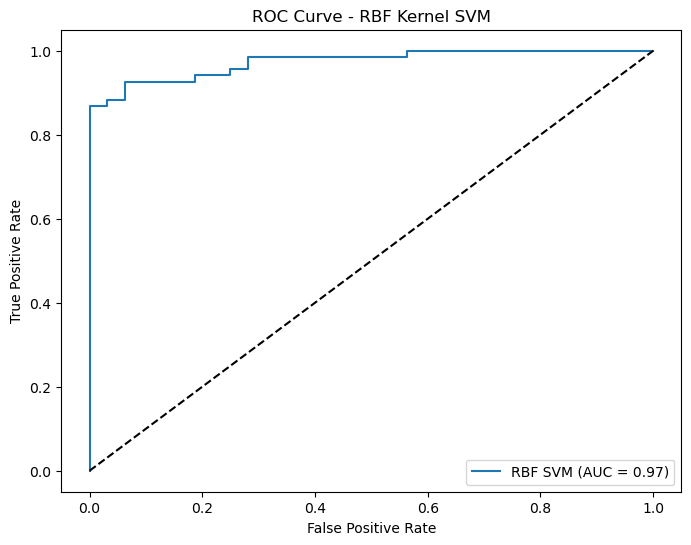

In [10]:
# Best model from grid search
best_rbf_svm = grid_search.best_estimator_

# Predictions
y_pred_rbf = best_rbf_svm.predict(X)
y_prob_rbf = best_rbf_svm.predict_proba(X)[:, 1]

# Evaluate
accuracy_rbf = accuracy_score(y, y_pred_rbf)
auc_rbf = roc_auc_score(y, y_prob_rbf)

print(f"RBF Kernel SVM Accuracy (Best Gamma): {accuracy_rbf:.4f}")
print(f"RBF Kernel SVM AUC (Best Gamma): {auc_rbf:.4f}")

# ROC Curve for RBF Kernel
fpr_rbf, tpr_rbf, _ = roc_curve(y, y_prob_rbf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF SVM (AUC = {auc_rbf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RBF Kernel SVM')
plt.legend(loc='lower right')
plt.show()


In [12]:
# Cross-validation accuracy scores for best RBF SVM
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rbf_svm, X, y, cv=kf, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")


Cross-validation scores: [0.85 0.8  1.   0.95 0.85]
Mean CV accuracy: 0.8900
